

<p style="width:65%;float:center;padding-left:50px">
<img src=https://media1.britannica.com/eb-media/04/20704-049-BB1BD66B.jpg>
<span style="font-size:smaller">
</span>
</p>


## Rayleigh Wave Ground Motions

The following equation describes the ground motion in x and z direction of a measurement point at location x with angular frequency $\omega$ and wavenumber k: 

$u_x = C ( e^{-0.8475 kz} - 0.5773 e^{-0.3933 kz} ) \sin [kx -\omega t]$

$u_z = C ( -0.8475 e^{-0.8475 kz} + 1.4679 e^{-0.3933 kz} ) \cos [kx -\omega t]$

### Exercise 1: Plot maximum displacements and energy as a function of depth

##### Strategy: Assume only max values (cos/sin terms can be ommitted) 

* Convert the above equations in Python using the numpy functions for sin and cos. Assume C = 1 and only use max values. 

* Modify the dominant period T in the range [5-100] and observe the consequences. What are the consequences when analysing surface wave observations?

In [9]:
# Some initialization
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

<IPython.core.display.Javascript object>


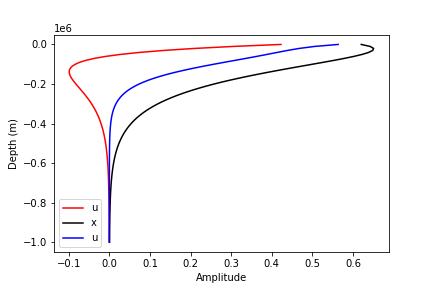

In [10]:
# Basic parameters
c = 3000  # m/s Phase velocity
T = 100    # period (s)
k = 2*np.pi/(T*c)
n=100     # points in depth
zmax=1000000 # max depth in m
z=np.linspace(0,zmax,n)

# Initialize in the next two lines ux and uz using functions from numpy. 
# Note that you can use z as a vector so you will end up with ux and uz 
# as a vector (as a function of depth)  
ux = np.exp(-0.8475 *k*z) - 0.5773 *np.exp(-0.3933 *k*z)
uz = -0.8475 *np.exp(-0.8475* k*z) + 1.4679 *np.exp(-0.3933 *k*z) 

# initialize the energy vector (sum of squared displacements)
energy=ux**2+uz**2

# Plotting
plt.figure()
plt.plot(ux,-z,'r-',uz,-z,'k-',energy,-z,'b-')
plt.xlabel('Amplitude')
plt.ylabel('Depth (m)')
plt.legend('ux' 'uz' 'energy')
plt.show()




### Exercise 2: Plot particle motion in the x-z plane for given depth

#### Strategy: Plot particle motion for an entire period, fixing x. Vary depth by hand and find the depth in which there is linear motion (z component only). Compatible with the results above?

* Add the time-dependent part of the equation

* Check out the equation you just derived and plug in the depth value at which the particle motion is linear. Does it match?

<IPython.core.display.Javascript object>


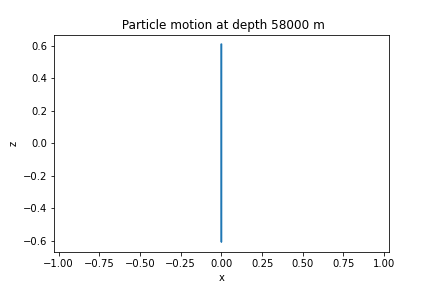

In [13]:
# We clear variables
del ux,uz, z # clear variables they will be scalars below

# Define time step, e.g. 100 points per period
n = 100    # sampling rate
T = 100    # Period in s
dt = T/n   # time step
imax = 101      # max loop index
x = 0.           # x location  
w = 2*np.pi/T    # angular frequency

# initialize ux, uz
ux = np.zeros(imax)
uz = np.zeros(imax)


# Give depth value  (modify this line!)
######################
z = 58000    # m
######################

# Loop over time and plot

plt.figure()

for i in range(imax):
    t = i*dt
    
    # Initialize here the displacements ux and uz including the cos/sin terms with time variable t, so this is exactly 
    # the equation from above inclduing the cos and sin terms
    ux[i] = (np.exp(-0.8475 *k*z) - 0.5773 *np.exp(-0.3933 *k*z))*np.sin(k*x-w*t)
    uz[i] = (-0.8475 *np.exp(-0.8475* k*z) + 1.4679 *np.exp(-0.3933 *k*z))*np.cos(k*x-w*t)
   

plt.plot(ux,uz)
plt.xlabel('x')
plt.ylabel('z')
plt.title(' Particle motion at depth '+str(round(z))+' m')
plt.axis('equal')
plt.show()



### Exercise 3: Plot depth of linear motion as a function of wavelength

* Formulate an equation for z0 (the depth at which the motion is linear) as a function of wavelength! Remember:

$
c=\frac{\omega}{k}
$




<IPython.core.display.Javascript object>


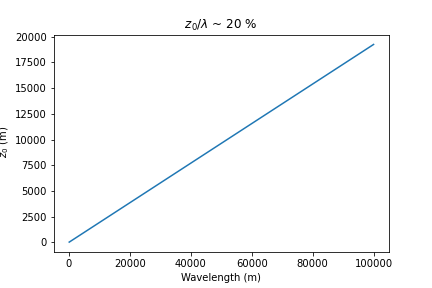

In [12]:
# Let us initialize a vector with wavelengths

lam = np.linspace(100,100000,1000)   # sampling wavelenghts between 100m and 100km

# plug it into the equation you just derived
#########################################################
z_zero = np.log(0.5773)/(2*np.pi/lam*(0.3933-0.8475))
#########################################################


# Plotting

plt.figure()
plt.plot(lam,z_zero)
plt.xlabel('Wavelength (m)')
plt.ylabel(' $z_0$ (m)')
plt.title(' $z_0/\lambda$ ~ 20 %  ')
plt.show()

    
